### 📘 Part 1: EDA — Step 1.1
**Name:** Sneha Varshney  
**Date:** 8 June 2025  

Below is the first few rows of the filtered Consumer Complaints dataset.


In [1]:
# Sneha Varshney | 8 June 2025
import pandas as pd

df = pd.read_csv('../data/consumer_complaints.csv')
df.head()


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,05/12/25,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,32222,NaN,NaN,Web,05/12/25,In progress,Yes,NaN,13472177
1,04/30/25,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,"EQUIFAX, INC.",GA,30238,NaN,NaN,Web,04/30/25,In progress,Yes,NaN,13269508
2,06/06/25,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,"EQUIFAX, INC.",GA,30324,NaN,NaN,Web,06/06/25,In progress,Yes,NaN,13930046
3,05/21/25,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",GA,31605,NaN,NaN,Web,05/21/25,In progress,Yes,NaN,13636959
4,02/04/25,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,10030,NaN,Consent not provided,Web,02/04/25,Closed with non-monetary relief,Yes,NaN,11903532


## 📘 Part 1: EDA — Step 1.2  
**Name:** Sneha Varshney  
**Date:** 8 June 2025  
**Task:** Filter dataset to include only 4 complaint categories and prepare labels for classification.

---

### 🔍 Target Categories:

| Original Product Name                                      | Mapped To Label                        |
|------------------------------------------------------------|----------------------------------------|
| Credit reporting or other personal consumer reports        | Credit reporting, repair, or other     |
| Debt collection                                            | Debt collection                        |
| Student loan                                               | Consumer Loan                          |
| Mortgage                                                   | Mortgage                               |


In [2]:
# Step 1.2 - Filter and clean data
# Sneha Varshney | 8 June 2025

categories_map = {
    "Credit reporting or other personal consumer reports": "Credit reporting, repair, or other",
    "Debt collection": "Debt collection",
    "Student loan": "Consumer Loan",  
    "Mortgage": "Mortgage"
}

df = df[df['Product'].isin(categories_map.keys())]
df['Product'] = df['Product'].map(categories_map)

df = df[['Product', 'Consumer complaint narrative']].dropna()

df = df.rename(columns={
    "Product": "label",
    "Consumer complaint narrative": "text"
})

label_map = {
    "Credit reporting, repair, or other": 0,
    "Debt collection": 1,
    "Consumer Loan": 2,
    "Mortgage": 3
}
df['label'] = df['label'].map(label_map)

df.head()


,label,text
42,0,CFPB Complaint Intent to Sue for Ongoing FCRA ...
46,0,"XXXX XXXX XXXX XXXX XXXX XXXX, XXXX XXXX XXXX,..."
50,0,I HAVE BEEN AFFECTED BY THE EQUIFAX DATA BREAC...
53,0,I have a goal of getting a house as soon as po...
64,0,"I recently obtained a copy of my Experian, Equ..."


## 📘 Part 1: EDA — Step 1.3  
**Name:** Sneha Varshney  
**Date:** 8 June 2025  
**Task:** Plot the distribution of complaints across the selected categories.

---

### 📊 Class Distribution Plot

This plot helps visualize the number of complaint records available in each of the 4 selected categories. A balanced class distribution is ideal for training machine learning models, while an imbalanced dataset may require handling techniques like oversampling, undersampling, or using class weights.


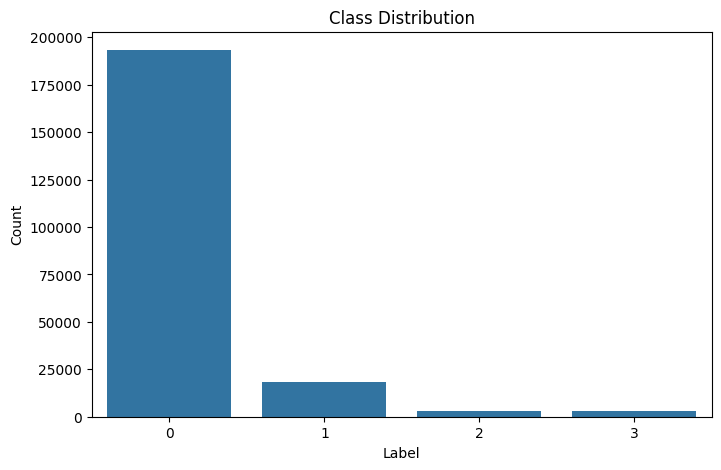

In [3]:
# Sneha Varshney | 8 June 2025
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='label', data=df)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


## 📘 Part 1: EDA — Step 1.3 (Extended)  
**Name:** Sneha Varshney  
**Date:** 8 June 2025  
**Task:** Merge filtered datasets and downsample the majority class to balance complaint categories.

---

### 🔄 Merging Filtered Data and Downsampling Majority Class

This step combines the original and additional consumer complaint datasets, normalizes and maps the product categories to numerical labels, and downsamples the majority class (Credit Reporting) to create a balanced dataset. Balancing the classes helps ensure fair and unbiased model training.


In [3]:
# Sneha Varshney | 8 June 2025
import pandas as pd
from sklearn.utils import resample

df1 = pd.read_csv('../data/consumer_complaints.csv')
df2 = pd.read_csv('../data/consumer_complaints_additional.csv')

df = pd.concat([df1, df2], ignore_index=True)

categories_map = {
    "Credit reporting or other personal consumer reports": "Credit reporting, repair, or other",
    "Debt collection": "Debt collection",
    "Student loan": "Consumer Loan",  
    "Mortgage": "Mortgage"
}

df = df[df['Product'].isin(categories_map.keys())]
df['Product'] = df['Product'].map(categories_map)

df = df[['Product', 'Consumer complaint narrative']].dropna()

df = df.rename(columns={
    "Product": "label",
    "Consumer complaint narrative": "text"
})

label_map = {
    "Credit reporting, repair, or other": 0,
    "Debt collection": 1,
    "Consumer Loan": 2,
    "Mortgage": 3
}
df['label'] = df['label'].map(label_map)

print("Before Downsampling:\n", df['label'].value_counts())

df_0 = df[df['label'] == 0]
df_1 = df[df['label'] == 1]
df_2 = df[df['label'] == 2]
df_3 = df[df['label'] == 3]

df_0_downsampled = resample(df_0, replace=False, n_samples=5000, random_state=42)
df_1_downsampled = resample(df_1, replace=False, n_samples=4090, random_state=42)

df_balanced = pd.concat([df_0_downsampled, df_1_downsampled, df_2, df_3])

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print("After Downsampling:\n", df_balanced['label'].value_counts())

df_balanced.head()


Before Downsampling:
 label
0    193260
1     33230
3      5225
2      4935
Name: count, dtype: int64
After Downsampling:
 label
3    5225
0    5000
2    4935
1    4090
Name: count, dtype: int64


,label,text
0,1,Amsher Collection Service Amount : XXXX I am w...
1,2,RE : Nelnet and Department of Education SAVE p...
2,1,Reliant Capital Solutions contacted a relative...
3,3,"In XX/XX/XXXX, I contacted Shellpoint Mortgage..."
4,1,PLEASE BLOCKED AND REMOVED I respectfully requ...


In [4]:
df_balanced.to_csv('../data/consumer_complaints_balanced.csv', index=False)


## 📘 Part 1: EDA — Step 1.4  
**Name:** Sneha Varshney  
**Date:** 8 June 2025  
**Task:** Plot the distribution of complaints across the balanced categories.

---

### 📊 Balanced Class Distribution Plot

This bar plot visualizes the number of complaint records available in each of the 4 balanced complaint categories after downsampling. It helps verify that the dataset is well-balanced for training multi-class classification models.


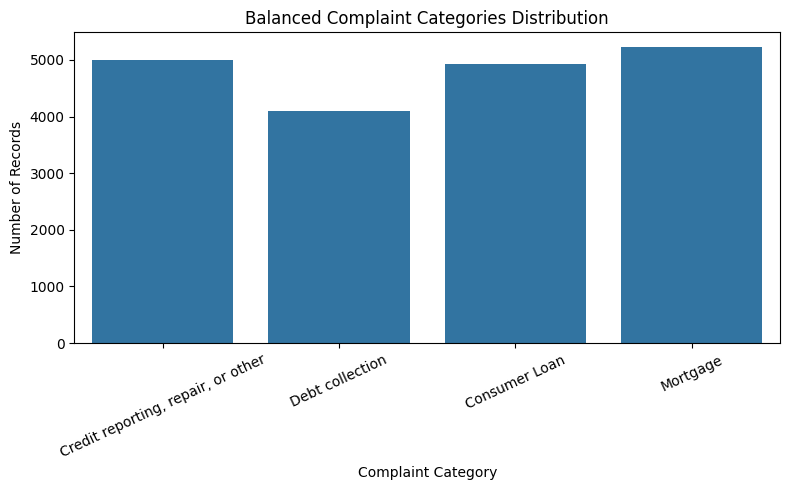

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

label_names = {
    0: "Credit reporting, repair, or other",
    1: "Debt collection",
    2: "Consumer Loan",
    3: "Mortgage"
}

df_balanced['category_name'] = df_balanced['label'].map(label_names)

plt.figure(figsize=(8,5))
sns.countplot(data=df_balanced, x='category_name', order=label_names.values())  # palette removed
plt.title("Balanced Complaint Categories Distribution")
plt.xlabel("Complaint Category")
plt.ylabel("Number of Records")
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()


## 📘 Part 2: Detailed Text Preprocessing  
**Name:** Sneha Varshney  
**Date:** 8 June 2025  
**Task:** Perform comprehensive text cleaning and normalization on consumer complaints for better model training.

---

### 🧹 Detailed Text Preprocessing Explanation

This step involves thorough cleaning and normalization of text data:

- **Lowercasing**: To maintain uniformity and reduce vocabulary size.
- **Removing URLs, emails, and phone numbers**: As these do not add meaningful context.
- **Expanding contractions**: Converts shortened forms (e.g., "can't") into full forms ("cannot").
- **Removing punctuation, numbers, and special characters**: To keep only meaningful words.
- **Removing stopwords**: Filters out common words that don't add value.
- **Lemmatization**: Converts words to their root form for consistency.
- **Removing extra whitespace**: Ensures clean tokens without leading/trailing spaces.

The cleaned text will be saved to a CSV file for use in modeling.


In [6]:
import pandas as pd
import re
import nltk
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if not isinstance(text, str):
        return ""

    # Lowercase
    text = text.lower()

    # Expand contractions (e.g., "can't" -> "cannot")
    text = contractions.fix(text)

    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)

    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)

    # Remove phone numbers (simple pattern)
    text = re.sub(r'\b\d{10,15}\b', '', text)

    # Remove punctuation and numbers, keep only alphabets and whitespace
    text = re.sub(r'[^a-z\s]', ' ', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize and remove stopwords, then lemmatize
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

    return ' '.join(tokens)

# Apply preprocessing
df_balanced['clean_text'] = df_balanced['text'].apply(clean_text)

df_balanced.to_csv('../data/consumer_complaints_balanced_clean.csv', index=False)

# Display before/after examples
print("Original text sample:\n", df_balanced['text'].iloc[0])
print("\nCleaned text sample:\n", df_balanced['clean_text'].iloc[0])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Original text sample:
 Amsher Collection Service Amount : XXXX I am writing to follow up on my original Debt Validation Request letter sent on XX/XX/year>, regarding the alleged debt associated with this account. As of today, I have not received a response from your company, which is a violation of the Fair Debt Collection Practices Act ( FDCPA ).

Under the FDCPA, you are required to provide verification of the debt within 30 days of receiving my initial request. Since you have not done so, I consider the debt to be invalid, and I request that you cease all collection activity on this account immediately an deleted from my consumer report.

Cleaned text sample:
 amsher collection service amount xxxx writing follow original debt validation request letter sent xx xx year regarding alleged debt associated account today received response company violation fair debt collection practice act fdcpa fdcpa required provide verification debt within day receiving initial request since done consid

## 📘 Part 3: Train-Test Split & TF-IDF Vectorization  
**Name:** Sneha Varshney  
**Date:** 8 June 2025  
**Task:** Split the cleaned dataset into training and testing sets, and convert the text into numerical features using TF-IDF.

---

### 🔍 Why This Step?

Machine learning models cannot directly understand text, so we convert the cleaned text into numeric vectors using **TF-IDF (Term Frequency-Inverse Document Frequency)**. It reflects how important a word is to a document in a corpus, improving model performance over raw counts.

Then we split our dataset into **training and testing sets** to train models and evaluate their generalization ability.


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('../data/consumer_complaints_balanced_clean.csv')

X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000) 

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"TF-IDF feature matrix (train): {X_train_tfidf.shape}")
print(f"TF-IDF feature matrix (test): {X_test_tfidf.shape}")


TF-IDF feature matrix (train): (15400, 5000)
TF-IDF feature matrix (test): (3850, 5000)


## 📘 Part 4: Model Selection - Multi-Class Classifiers  
**Name:** Sneha Varshney  
**Date:** 8 June 2025  
**Task:** Select and train multiple machine learning classifiers suitable for multi-class text classification.

---

### 🎯 Objective

Evaluate multiple classification algorithms to determine which performs best on the consumer complaint dataset. The following models are selected:

- Logistic Regression
- Multinomial Naive Bayes
- Random Forest Classifier
- Support Vector Machine (SVM)


In [10]:
# Sneha Varshney | Part 4: Model Comparison
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Linear SVM": LinearSVC()
}

model_reports = {}

for name, model in models.items():
    print(f"\n🔍 Training: {name}")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    model_reports[name] = {
        'accuracy': acc,
        'classification_report': report,
        'model': model
    }

    print(f"✅ Accuracy: {acc:.4f}")
    print("📊 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=[
        "Credit reporting, repair, or other",
        "Debt collection",
        "Consumer Loan",
        "Mortgage"
    ]))



🔍 Training: Logistic Regression
✅ Accuracy: 0.9151
📊 Classification Report:
                                    precision    recall  f1-score   support

Credit reporting, repair, or other       0.86      0.90      0.88      1000
                   Debt collection       0.86      0.84      0.85       818
                     Consumer Loan       0.96      0.94      0.95       987
                          Mortgage       0.97      0.96      0.97      1045

                          accuracy                           0.92      3850
                         macro avg       0.91      0.91      0.91      3850
                      weighted avg       0.92      0.92      0.92      3850


🔍 Training: Multinomial Naive Bayes
✅ Accuracy: 0.8761
📊 Classification Report:
                                    precision    recall  f1-score   support

Credit reporting, repair, or other       0.83      0.90      0.87      1000
                   Debt collection       0.87      0.71      0.78       818
  

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

log_reg_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}

svm_grid = {
    'C': [0.01, 0.1, 1, 10],
    'loss': ['hinge', 'squared_hinge']
}

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg_cv = GridSearchCV(log_reg, log_reg_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
log_reg_cv.fit(X_train_tfidf, y_train)

print("🔍 Best Logistic Regression Params:", log_reg_cv.best_params_)
print("✅ Best Logistic Regression Accuracy:", log_reg_cv.best_score_)

svm = LinearSVC(random_state=42)
svm_cv = GridSearchCV(svm, svm_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
svm_cv.fit(X_train_tfidf, y_train)

print("🔍 Best SVM Params:", svm_cv.best_params_)
print("✅ Best SVM Accuracy:", svm_cv.best_score_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


E:\codePlayGround\kaiburr-task5-text-classification\venv\Lib\site-packages\joblib\externals\loky\process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
E:\codePlayGround\kaiburr-task5-text-classification\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


🔍 Best Logistic Regression Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
✅ Best Logistic Regression Accuracy: 0.9195454545454546
Fitting 5 folds for each of 8 candidates, totalling 40 fits
🔍 Best SVM Params: {'C': 1, 'loss': 'hinge'}
✅ Best SVM Accuracy: 0.9214935064935064


## 📘 Part 5: Model Optimization — Hyperparameter Tuning  
**Name:** Sneha Varshney  
**Date:** 8 June 2025  
**Task:** Improve model accuracy using Grid Search on the best-performing classifiers (Logistic Regression and Linear SVM).

---

### 🔧 Why Hyperparameter Tuning?

Each model has parameters that are not learned during training (e.g., regularization strength `C`, penalty types). Tuning these hyperparameters allows us to better fit the data, reduce overfitting or underfitting, and improve the model's generalization.

We will use `GridSearchCV` from `scikit-learn` to perform 5-fold cross-validation and search for the best combination of parameters.

---


# 📘 Part 6: Comparison of Model Performance
**Name:** Sneha Varshney  
**Date:** 8 June 2025  
**Task:** Compare performance of all trained models using accuracy and F1-score.

---

### 🔍 Why This Step?
To identify the best-performing model using key metrics like:

- **Accuracy**: Measures the overall correctness of the model.
- **Precision**: Measures how many selected items are relevant.
- **Recall**: Measures how many relevant items are selected.
- **F1-score**: Harmonic mean of precision and recall — useful for imbalanced classes.

A visual comparison helps in making a clear decision about which model performs best for your task.

---


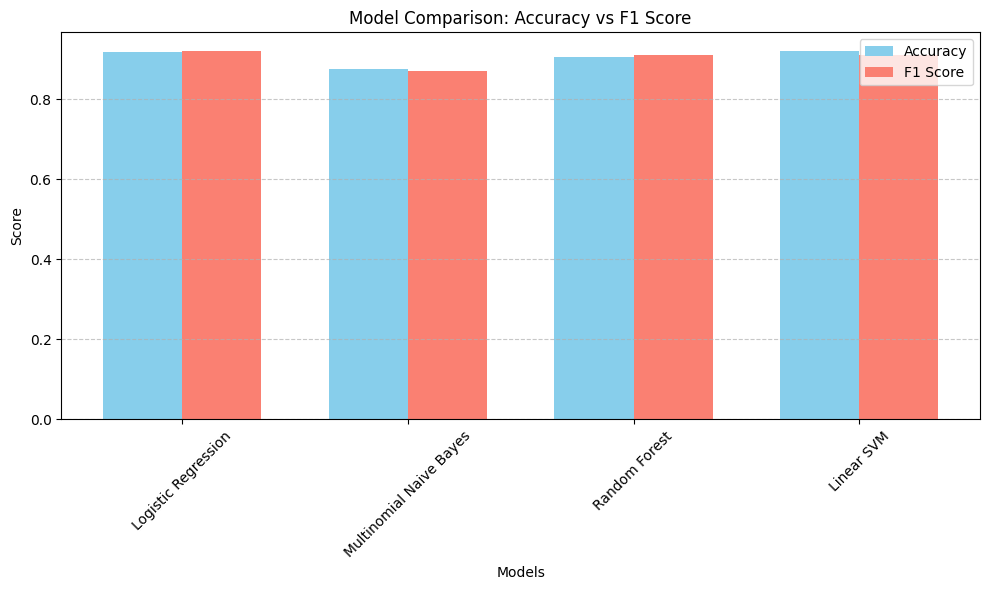

In [12]:
import matplotlib.pyplot as plt

model_reports = {
    'Logistic Regression': {'accuracy': 0.9195, 'f1-score': 0.92},
    'Multinomial Naive Bayes': {'accuracy': 0.8761, 'f1-score': 0.87},
    'Random Forest': {'accuracy': 0.9060, 'f1-score': 0.91},
    'Linear SVM': {'accuracy': 0.9215, 'f1-score': 0.91}
}

model_names = list(model_reports.keys())
accuracies = [model_reports[model]['accuracy'] for model in model_names]
f1_scores = [model_reports[model]['f1-score'] for model in model_names]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(model_names))

plt.bar(index, accuracies, bar_width, label='Accuracy', color='skyblue')
plt.bar([i + bar_width for i in index], f1_scores, bar_width, label='F1 Score', color='salmon')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Comparison: Accuracy vs F1 Score')
plt.xticks([i + bar_width/2 for i in index], model_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 📘 Part 7: Model Evaluation Using Confusion Matrix  
**Name:** Sneha Varshney  
**Date:** 8 June 2025  
**Task:** Evaluate the best-performing model using a confusion matrix to understand the model’s prediction behavior.

---

### 🎯 Why This Step?  
While accuracy and F1-score provide overall performance, a **confusion matrix** gives a **granular view**:

- How many complaints are correctly predicted?  
- Are any categories being misclassified often?  
- Does the model perform consistently across all classes?

---

### 📊 Confusion Matrix Terms:

- **True Positive (TP):** Correctly predicted as that class.  
- **False Positive (FP):** Incorrectly predicted as that class.  
- **False Negative (FN):** Missed prediction for that class.  
- **True Negative (TN):** Correctly predicted as not that class.


<Figure size 1000x600 with 0 Axes>

E:\codePlayGround\kaiburr-task5-text-classification\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


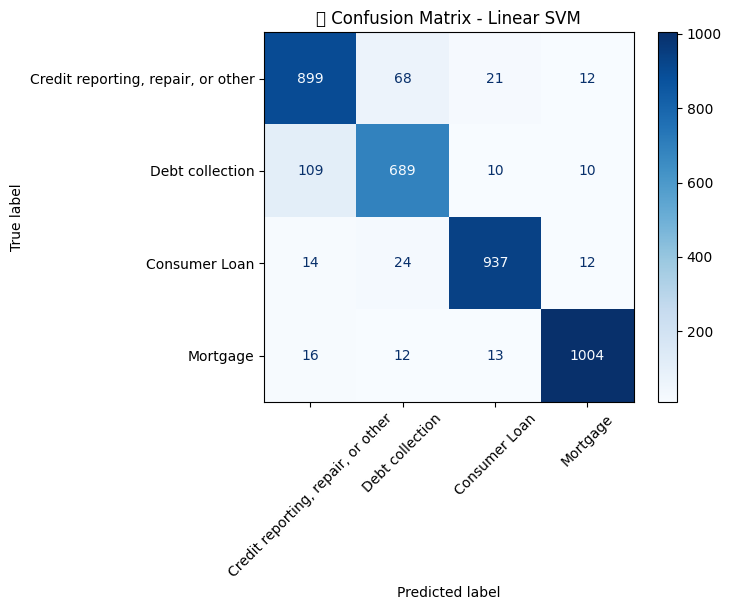

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC

best_model = LinearSVC(C=1, loss='hinge', random_state=42)
best_model.fit(X_train_tfidf, y_train)

y_pred = best_model.predict(X_test_tfidf)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names.values())

plt.figure(figsize=(10, 6))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("📊 Confusion Matrix - Linear SVM")
plt.grid(False)
plt.show()


## 📘 Part 8: Saving the Best Performing Model  
**Name:** Sneha Varshney  
**Date:** 8 June 2025  
**Task:** Persist the best-performing machine learning model for future use.

---

### 💾 Why This Step?  
After training and evaluating multiple models, it's essential to save the best one so you can:

- Reuse it for prediction without retraining.
- Deploy it into a production environment.
- Share it with others or integrate it into applications.

We use **joblib** for saving the model, which is efficient for large numpy arrays used in scikit-learn.

---

### 📂 Artifacts to Save:
- Best model (e.g., SVM)
- TF-IDF Vectorizer (for transforming new incoming text)
- Label encoder (for mapping predicted labels back to category names)

This ensures reproducibility and seamless deployment.


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
import joblib
import os


tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)


best_svm_model = LinearSVC(C=1, loss='hinge', random_state=42)
best_svm_model.fit(X_train_tfidf, y_train_encoded)


save_path = "E:/codePlayGround/kaiburr-task5-text-classification/model"
os.makedirs(save_path, exist_ok=True)

joblib.dump(best_svm_model, os.path.join(save_path, "final_svm_model.joblib"))
joblib.dump(tfidf_vectorizer, os.path.join(save_path, "tfidf_vectorizer.joblib"))
joblib.dump(label_encoder, os.path.join(save_path, "label_encoder.joblib"))

print("✅ Final SVM model and components saved successfully in 'model/' folder!")


✅ Final SVM model and components saved successfully in 'model/' folder!


## 📦 Part 9: Loading and Using the Saved Model for Prediction

**Name:** Sneha Varshney  
**Date:** 8 June 2025  
**Task:** Load the saved SVM model, TF-IDF vectorizer, and label encoder to predict the category of new consumer complaint texts.

---

### 🎯 Why This Step?
After model development, we need to verify its real-world utility. This involves:
- Loading the saved components.
- Preprocessing new input text.
- Making predictions.
- Decoding predicted labels to understandable categories.

---

### 🧪 Example Use Case:
We will test the model by predicting categories of sample consumer complaint texts.


In [43]:
import joblib
import os

model_path = "E:/codePlayGround/kaiburr-task5-text-classification/model"


svm_model = joblib.load(os.path.join(model_path, "final_svm_model.joblib"))
tfidf_vectorizer = joblib.load(os.path.join(model_path, "tfidf_vectorizer.joblib"))

label_names = {
    0: "Credit reporting, repair, or other",
    1: "Debt collection",
    2: "Consumer Loan",
    3: "Mortgage"
}

def predict_complaint_category(text):
    text_transformed = tfidf_vectorizer.transform([text])
    predicted_label = svm_model.predict(text_transformed)[0]
    return label_names.get(predicted_label, "Unknown Category")

sample_complaints = [
    "I am getting constant calls from a debt collector regarding a loan I never took.",
    "My mortgage application has been delayed for over 3 months with no updates.",
    "I found incorrect information on my credit report and need it fixed immediately."
]

print("🔮 Predicted Categories:")
for complaint in sample_complaints:
    category_title = predict_complaint_category(complaint)
    print(f"📝 Complaint: {complaint}\n📌 Predicted Category: {category_title}\n")


🔮 Predicted Categories:
📝 Complaint: I am getting constant calls from a debt collector regarding a loan I never took.
📌 Predicted Category: Consumer Loan

📝 Complaint: My mortgage application has been delayed for over 3 months with no updates.
📌 Predicted Category: Mortgage

📝 Complaint: I found incorrect information on my credit report and need it fixed immediately.
📌 Predicted Category: Credit reporting, repair, or other



### 📦 Part 10: Interactive Complaint Classifier (Console Version)

In this section, we enable user interaction without a web app like Streamlit. Instead, we use a command-line interface to accept user queries.

**Functionality:**
- Accepts a user complaint via input.
- Uses the trained Linear SVM model to classify the complaint.
- Displays the predicted category (in human-readable form).

🧠 *Model Used*: Linear SVM (after hyperparameter tuning)

📚 *Labels Mapped*: Based on a predefined dictionary mapping label indices to category names.


In [ ]:
import joblib
import os

model_path = "E:/codePlayGround/kaiburr-task5-text-classification/model"

svm_model = joblib.load(os.path.join(model_path, "final_svm_model.joblib"))
tfidf_vectorizer = joblib.load(os.path.join(model_path, "tfidf_vectorizer.joblib"))
label_encoder = joblib.load(os.path.join(model_path, "label_encoder.joblib"))

label_names = {
    0: "Credit reporting, repair, or other",
    1: "Debt collection",
    2: "Consumer Loan",
    3: "Mortgage"
}

def predict_complaint_category(text):
    text_transformed = tfidf_vectorizer.transform([text])
    predicted_encoded = svm_model.predict(text_transformed)[0]
    return label_names.get(predicted_encoded, "Unknown Category")

while True:
    user_input = input("📝 Enter your complaint (or type 'exit' to quit):\n")
    if user_input.lower() == 'exit':
        print("👋 Exiting the classifier. Goodbye!")
        break

    predicted_category = predict_complaint_category(user_input)
    print(f"📌 Predicted Complaint Category: {predicted_category}\n")


📝 Enter your complaint (or type 'exit' to quit):
 I am getting constant calls from a debt collector regarding a loan I never took.


📌 Predicted Complaint Category: Consumer Loan



📝 Enter your complaint (or type 'exit' to quit):
 My mortgage application has been delayed for over 3 months with no updates.


📌 Predicted Complaint Category: Mortgage



📝 Enter your complaint (or type 'exit' to quit):
 I found incorrect information on my credit report and need it fixed immediately.


📌 Predicted Complaint Category: Credit reporting, repair, or other

